In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import random

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 428

130.05964279174805 73.15660761862459
127.73291397094727 72.6346266065069
129.3377456665039 72.41733654606415


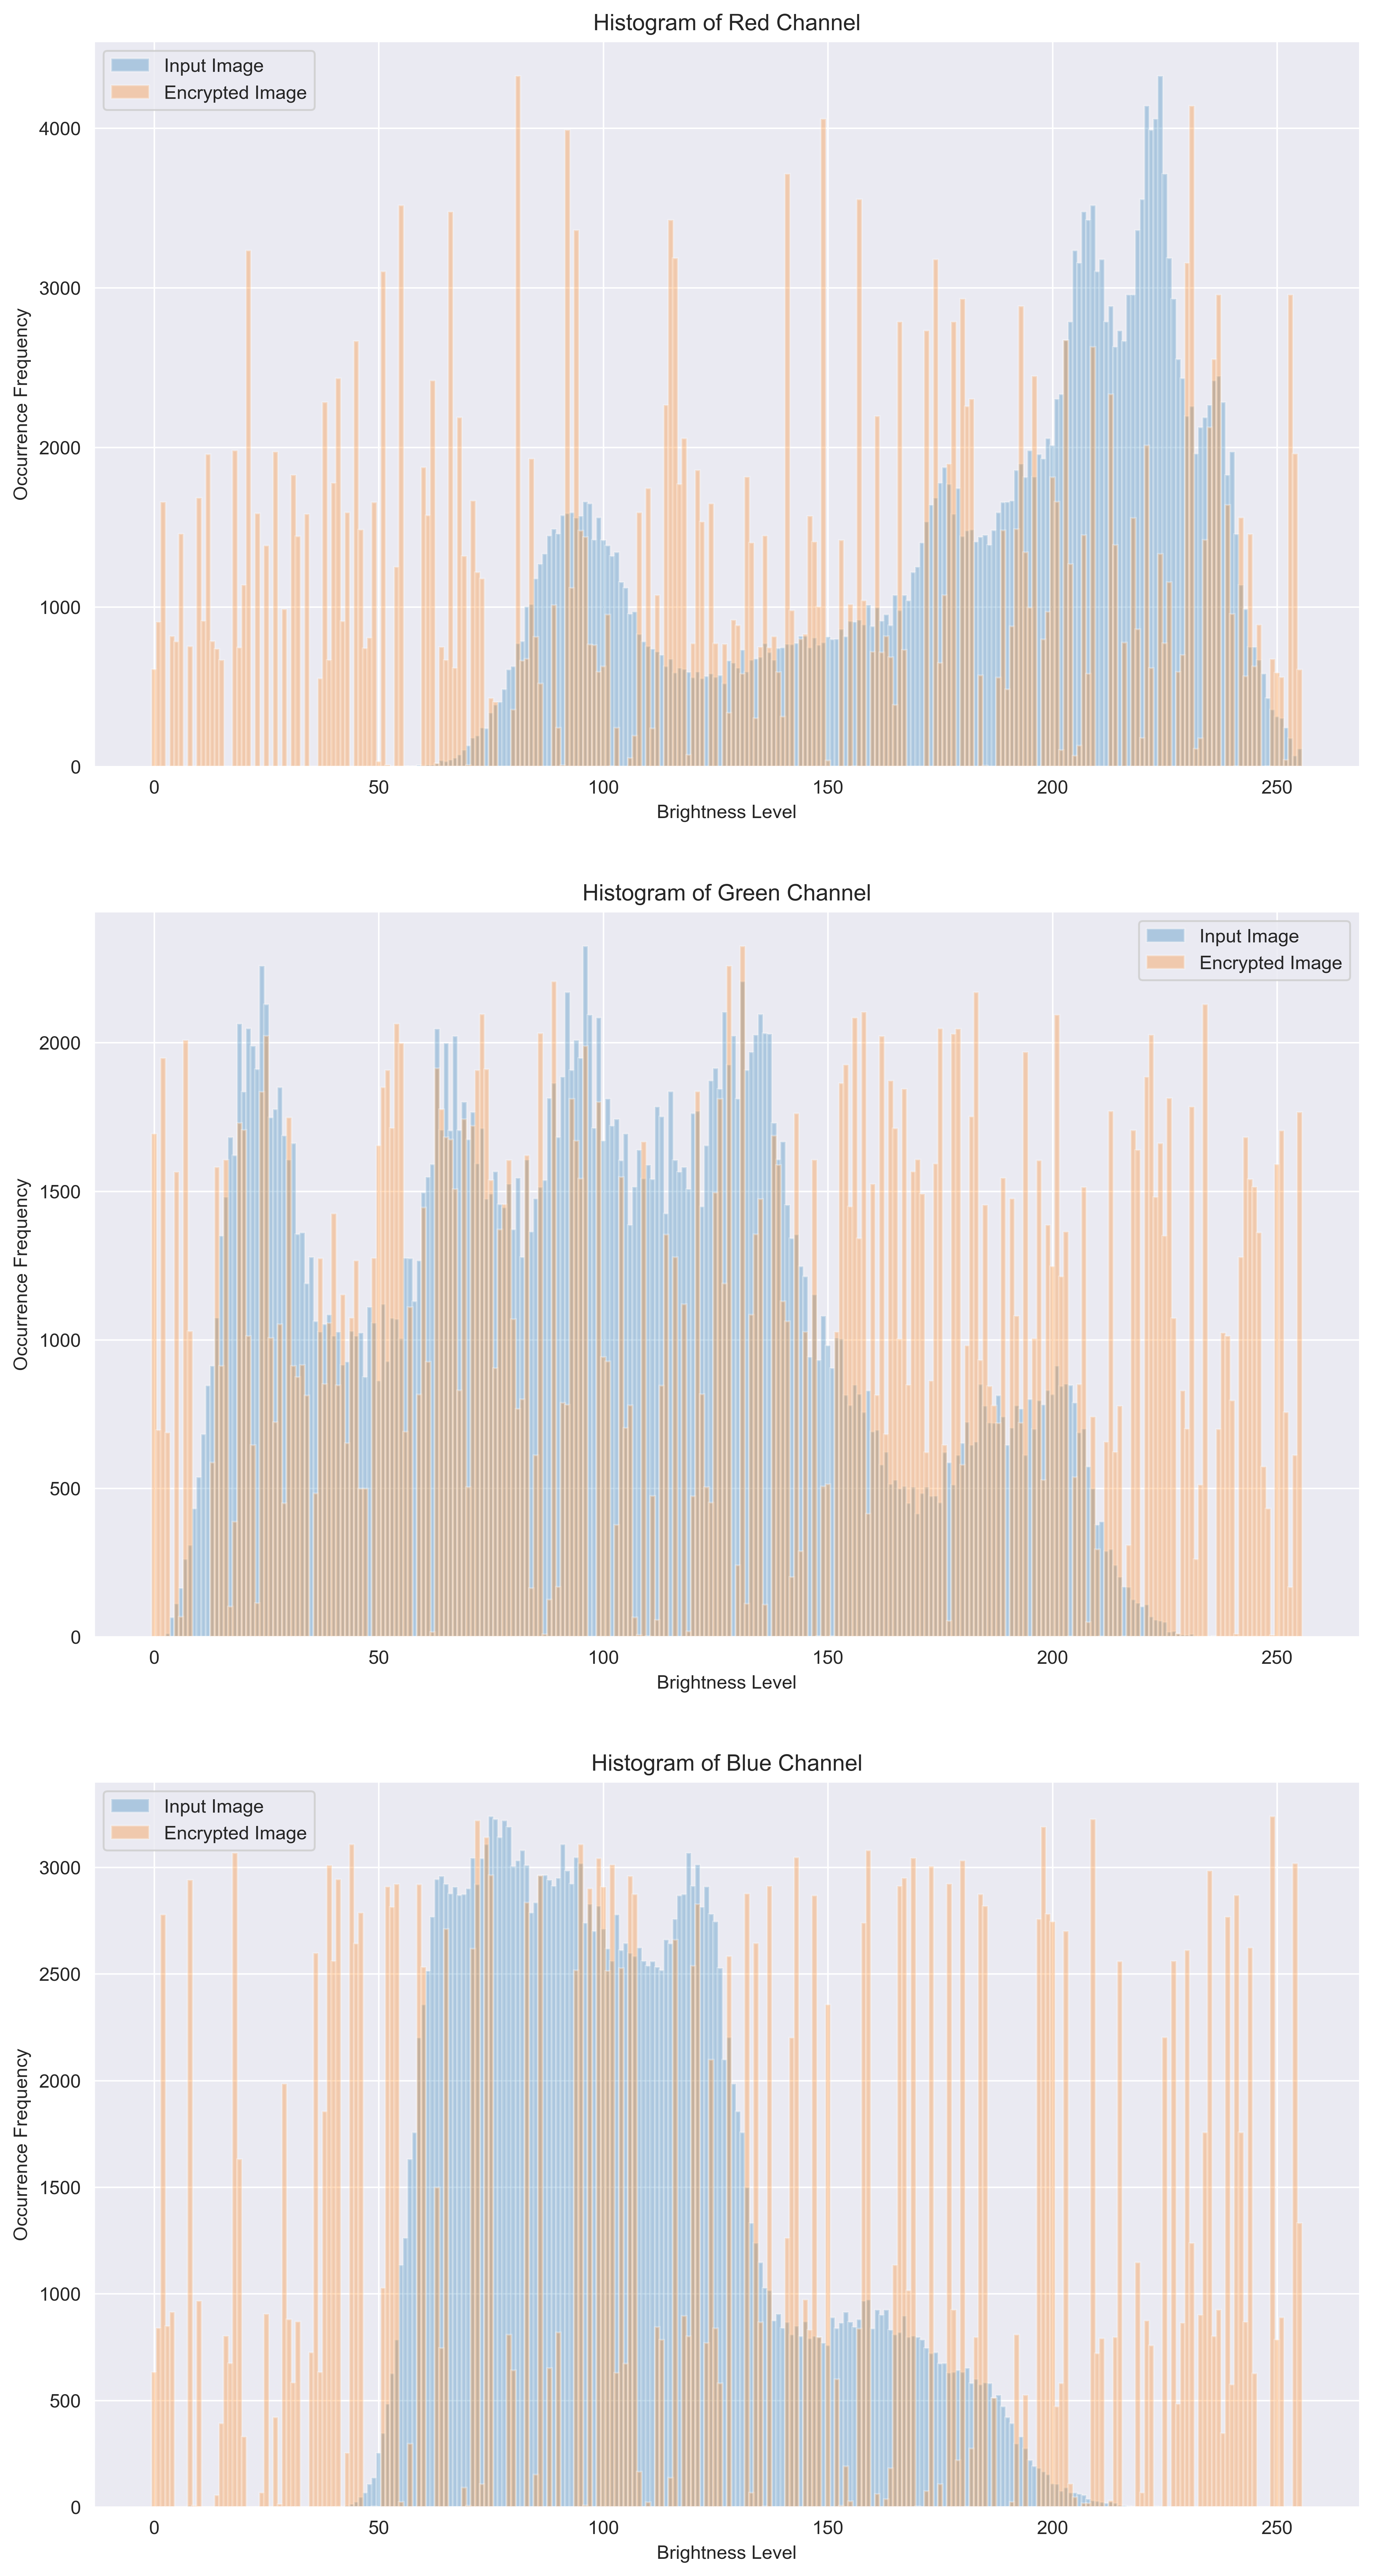

True

In [4]:
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    print(mean,np.sqrt(variance))

def Analysis(orginal:np.array,encode:np.array,Gray=False):
    if not Gray:
        orginal = cv2.cvtColor(orginal, cv2.COLOR_BGR2RGB)
        encode = cv2.cvtColor(encode, cv2.COLOR_BGR2RGB)
        title_ = "Histogram of {0} Channel"
        plt.rcParams['figure.figsize'] = [12, 24]
    else :
        title_ = "Histogram of gray-level Channel"
        plt.rcParams['figure.figsize'] = [12, 8]
    
    for c in range(orginal.shape[2]):
        e_hist = cv2.calcHist([encode],[c],None,[256],[0,256]) 
        e_hist = np.reshape(e_hist,(256,))
        variance(np.reshape(encode[:,:,c],(encode.shape[0]*encode.shape[1],)))

        o_hist = cv2.calcHist([orginal],[c],None,[256],[0,256]) 
        o_hist = np.reshape(o_hist,(256,))
        
        if c == 0 : title = title_.format("Red")        
        if c == 1 : title = title_.format("Green")
        if c == 2 : title = title_.format("Blue")
        
        if not Gray:
            plt.subplot(3,1,c+1)
            plt.bar(list(range(256)),o_hist,width=1.1, alpha=0.3, label = "Input Image", align='center')
            plt.bar(list(range(256)),e_hist,width=1.1, alpha=0.3, label = "Encrypted Image",align='center')
        else :
            plt.bar(list(range(256)),o_hist,width=6, alpha=0.3, label = "Input Image", align='center')
            plt.bar(list(range(256)),e_hist,width=6, alpha=0.3, label = "Encrypted Image",align='center')
        plt.title(title)
        plt.xlabel("Brightness Level")
        plt.ylabel("Occurrence Frequency")
        plt.legend()
        if Gray:
            plt.show()
            break
    if not Gray:
        plt.show()
        
def ImageRandom(image:np.array,random_rate=1000,save_path="./lut"):
    image = image.copy()
    r_lut = list(range(256))
    g_lut = list(range(256))
    b_lut = list(range(256))
    
    random.shuffle(r_lut)
    random.shuffle(g_lut)
    random.shuffle(b_lut)
    
    r_lut = np.array(r_lut)
    g_lut = np.array(g_lut)
    b_lut = np.array(b_lut)
    
    
    lut = np.array([r_lut,g_lut,b_lut])
    np.savez_compressed(save_path+"_pixle_rgb.npz",lut)
    
    output = ""
    for _ in range(random_rate):
        pos = random.sample(list(range(image.shape[0])),2)
        image[[pos[0],pos[1]],:,:] = image[[pos[1],pos[0]],:,:]
        output += "{0}, {1}, ROW\n".format(pos[0],pos[1])
        
        pos = random.sample(list(range(image.shape[1])),2)
        image[:,[pos[0],pos[1]],:] = image[:,[pos[1],pos[0]],:]
        output += "{0}, {1}, COL\n".format(pos[0],pos[1])
        
    open(save_path+"_keys.csv","w").write(output)
    
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            image[row][col][2] =  r_lut[image[row][col][2]]  
            image[row][col][1] =  g_lut[image[row][col][1]]  
            image[row][col][0] =  b_lut[image[row][col][0]]  
     
           
    return image


image = cv2.imread("./Lenna.png")
_ = ImageRandom(image,5000,"./our_lut")
Analysis(image,_)
cv2.imwrite("encrypt.png",_)


127.33130930675574 26.083163043853567
126.77265850033707 26.14905652726475
127.20016285418072 26.144281173243517


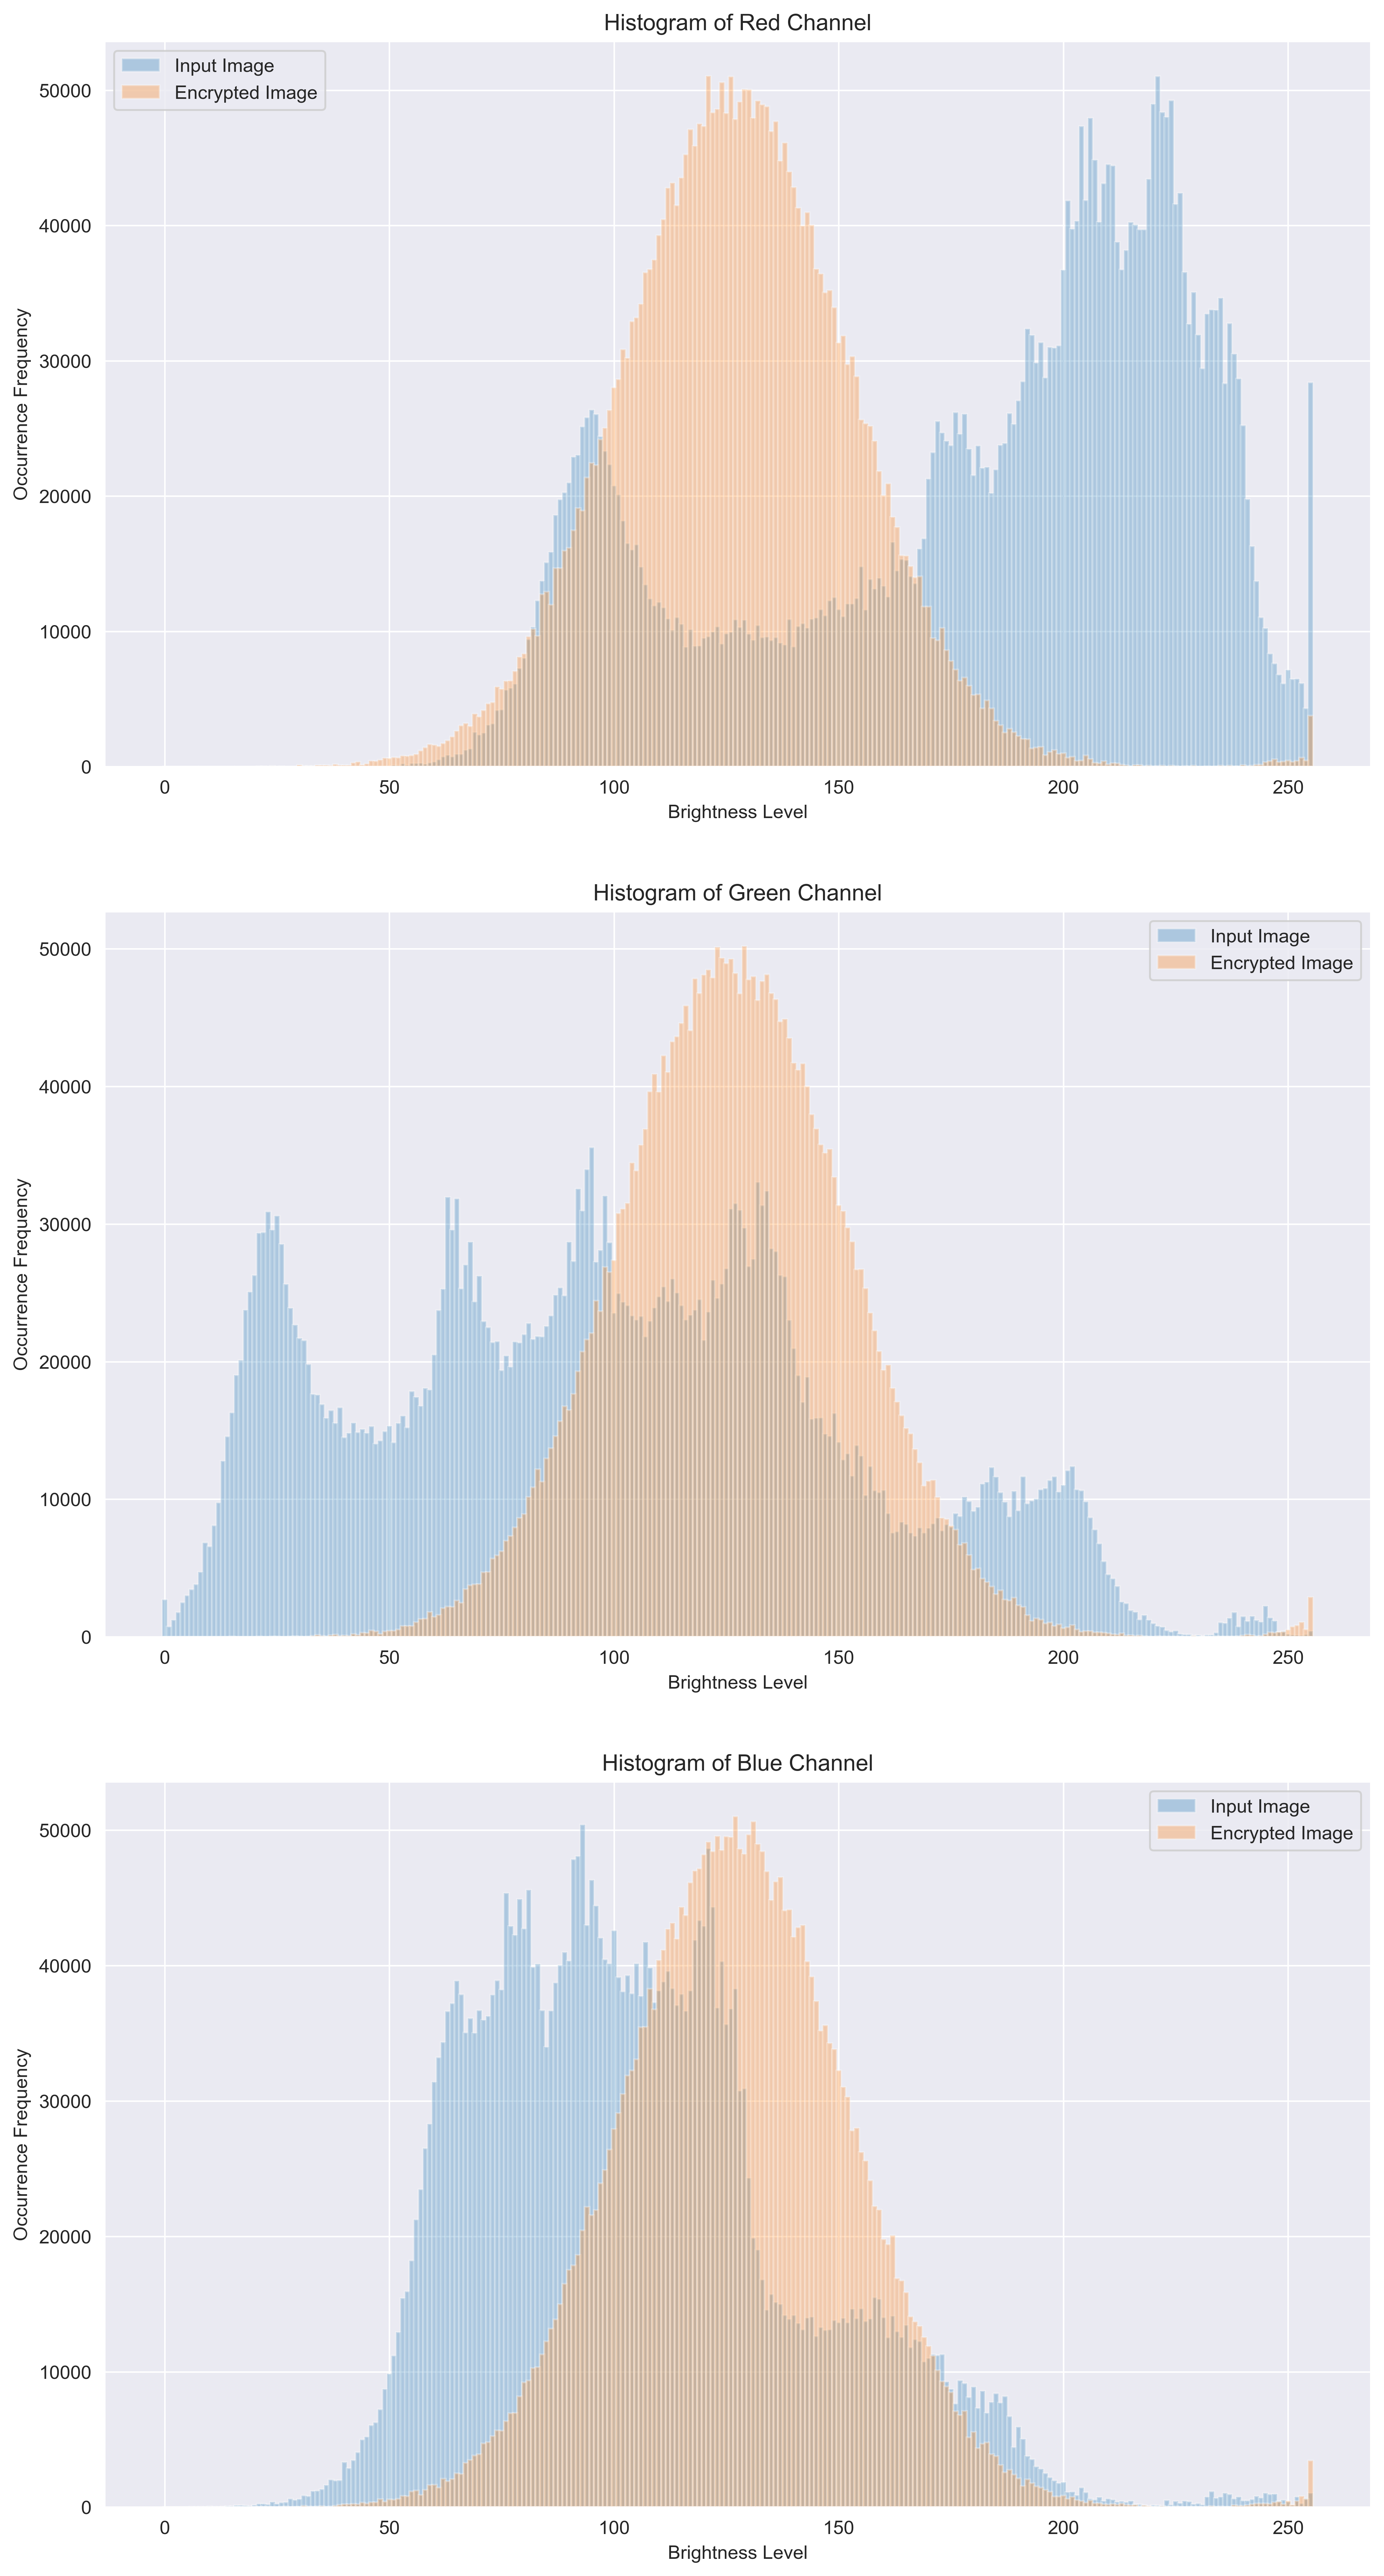

In [5]:
encode = cv2.imread("./Method 10/10-Cipher.png")
orginal = cv2.imread("./Method 10/10-Plain.png")
Analysis(orginal,encode,False)


127.05531804175851 24.360854713071515
127.19460068642526 23.864399371547556
126.90616496424624 24.81766529860426


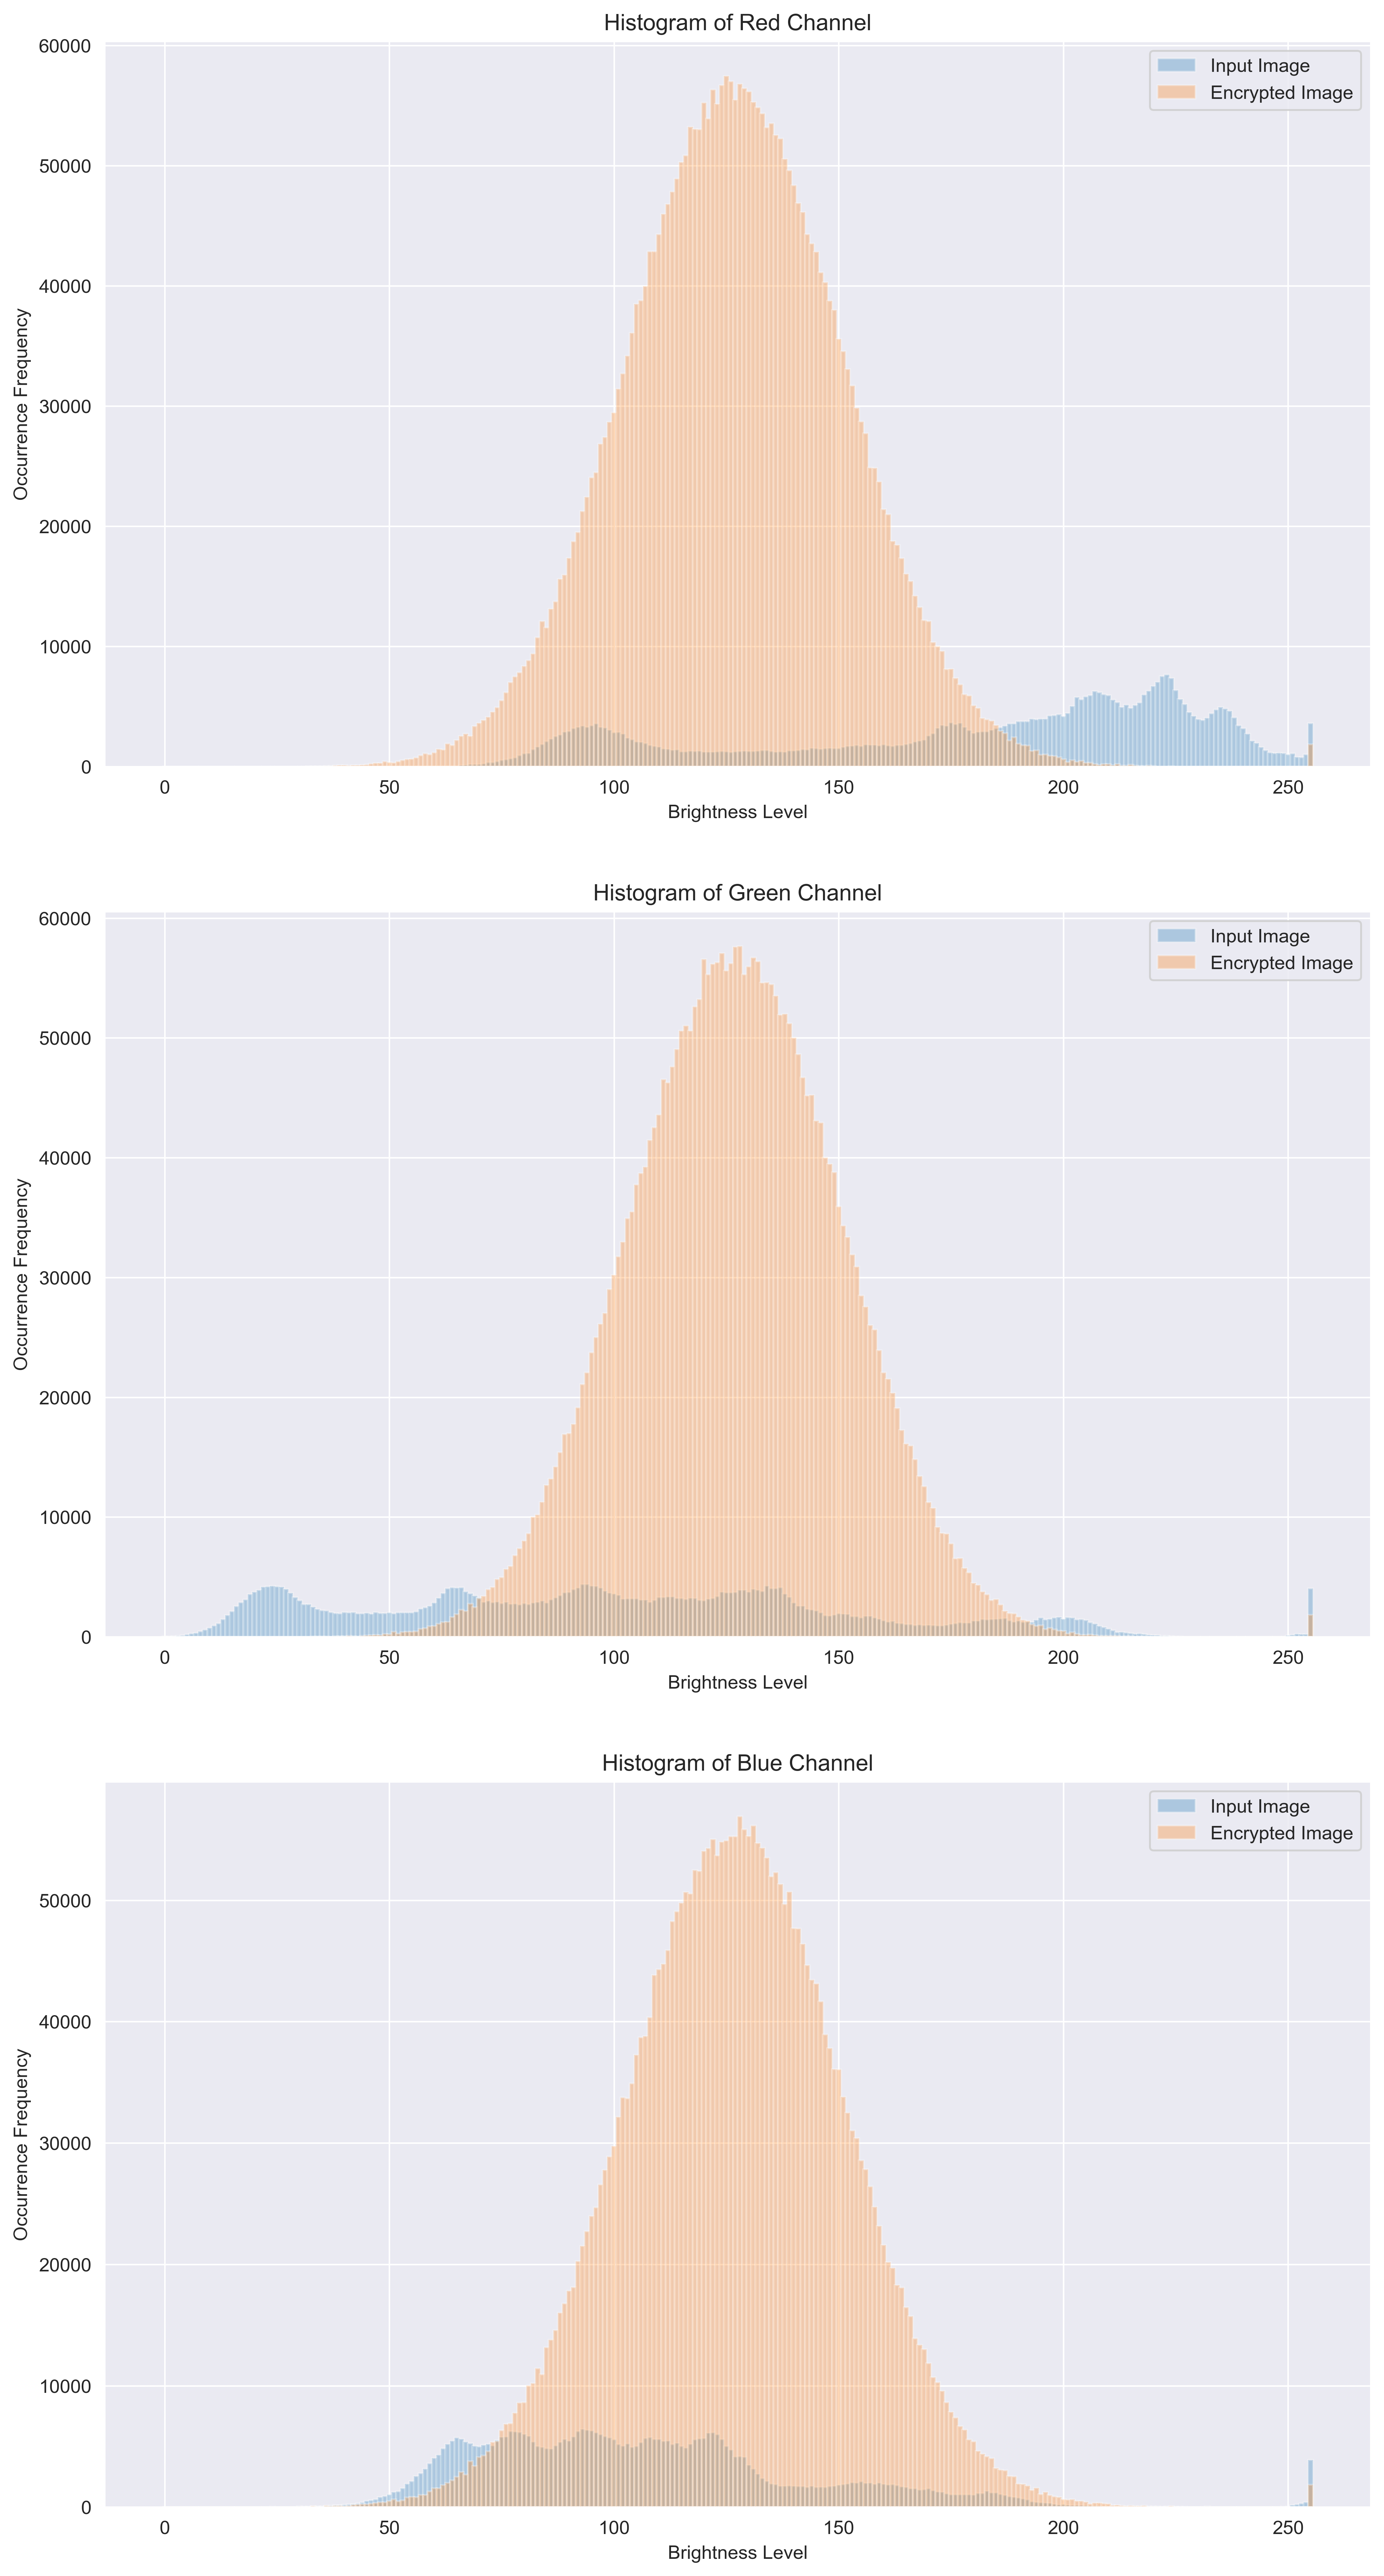

In [6]:
encode = cv2.imread("./Method 13/13-Cipher.png")
orginal = cv2.imread("./Method 13/13-Plain.png")
Analysis(orginal,encode,False)

127.2580660158066 35.88814718132076


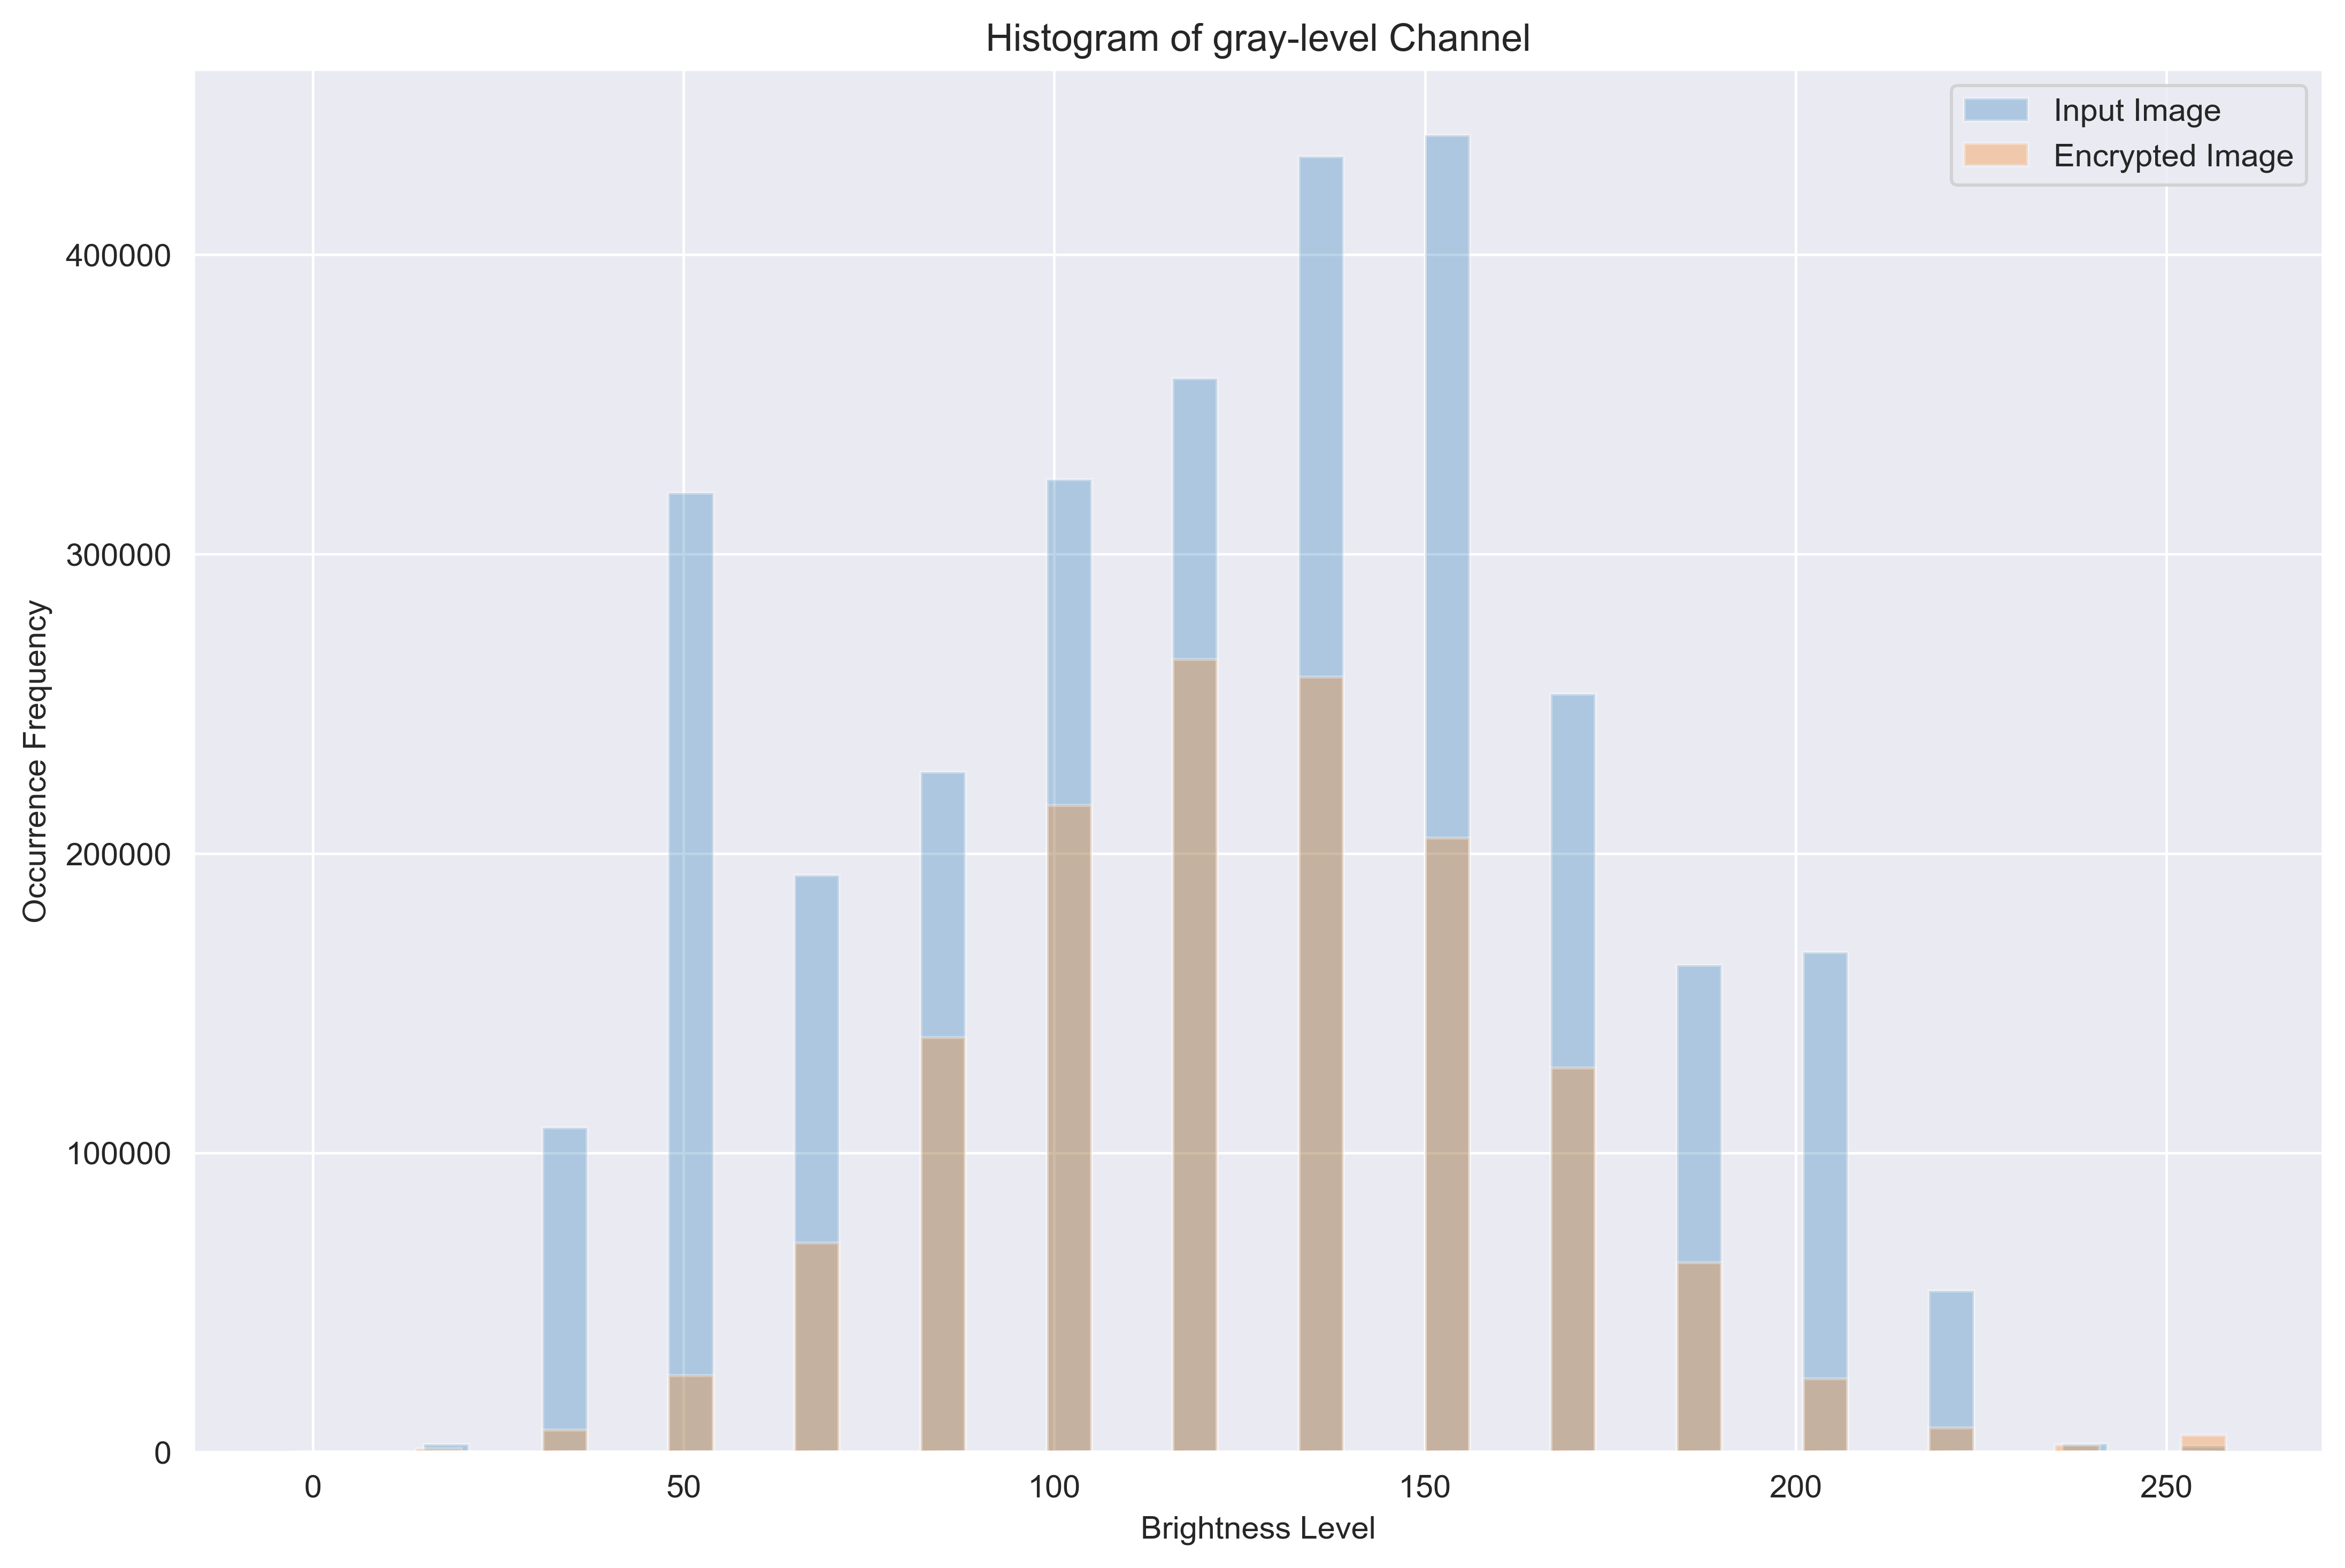

In [7]:
encode = cv2.imread("./Method 14/14-Cipher.png")
orginal = cv2.imread("./Method 14/14-Plain.png")
Analysis(orginal,encode,True)